# OBJECTIVE:

# To apply SVM on Amazon food reviews

In [1]:
%%time
# Functions to retireve files 
import pickle
def openfromfile(filename):
   temp = pickle.load(open(filename,"rb"))
   return temp

Wall time: 0 ns


In [2]:
#Loading the variable from file
final_100000 = openfromfile("prepocessed_data.pickle")
final_100000.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
3,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
4,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


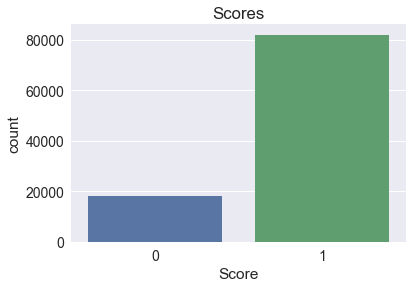

Wall time: 320 ms


In [11]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt
ax=plt.axes()
sns.countplot(final_100000.Score,ax=ax)
plt.title("Scores")
plt.show()
final_100000['Score'].value_counts()

In [12]:
%%time
final_100000['Score'].value_counts()

Wall time: 4 ms


1    81998
0    18002
Name: Score, dtype: int64

In [3]:
%%time
#storing cleanedtext into x and Score into y
x = final_100000['CleanedText']
y = final_100000['Score']
#Splitting the data into train and test data with 70:30 ratio.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, shuffle=False)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(70000,)
(30000,)
(70000,)
(30000,)
Wall time: 11.5 s


# 1.BOW:

In [4]:
%%time
#loading the Bag of words train and test data
Train_BOW_X = openfromfile("kfold_tr_bow_x.pickle")
Test_BOW_X= openfromfile("kfold_te_bow_x.pickle")
print(Train_BOW_X .shape)
print(Test_BOW_X.shape)

(70000, 37337)
(30000, 37337)
Wall time: 609 ms


# 1.1 BOW Linear kernel:

In [15]:
%%time
import warnings
warnings.filterwarnings('ignore')

Wall time: 0 ns


Finding the best 'C' using the Grid search cross validation(K-fold cross validation):

In [16]:
%%time
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
clf = LinearSVC()
#params we need to try on classifier
param_grid = {'C':[50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
#using grid search cross validate to find best hyperparameter
GSV = GridSearchCV(clf,param_grid,cv=3,verbose=1,n_jobs=-1, scoring="f1")#using grid serch 
GSV.fit(Train_BOW_X, Y_train)
#printing the hyperparameter.
print("Best HyperParameter: ",GSV.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(GSV.best_score_*100))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   58.8s finished


Best HyperParameter:  {'C': 0.5}
Best Accuracy: 88.74%
Wall time: 1min


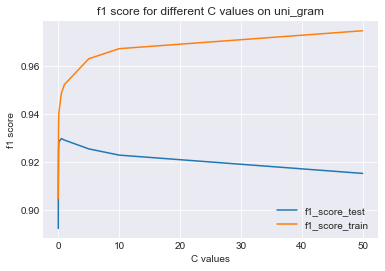

Wall time: 31.4 s


In [15]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
C=[50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
f1_score_test=[]
f1_score_train=[]
for i in C:
   lsvc =  LinearSVC(C=i)
   #finding the test score to plot
   lsvc.fit(Train_BOW_X, Y_train)
   predict_test=lsvc.predict(Test_BOW_X)
   f1_score_i= f1_score(Y_test,predict_test)
   f1_score_test.append(f1_score_i)
   #finding the train score to plot
   predict_train=lsvc.predict(Train_BOW_X)
   f1_score_j= f1_score(Y_train,predict_train)
   f1_score_train.append(f1_score_j)
sns.set_style("darkgrid");
plt.plot(C,f1_score_test)
plt.plot(C,f1_score_train)
plt.xlabel("C values")
plt.ylabel("f1 score")
plt.title("f1 score for different C values on uni_gram")
plt.gca().legend(('f1_score_test','f1_score_train'))
plt.show()    

Observation:

1.From the above graph, model is overfitting at high C values since,test score curve(blue line) is decreasing and train score(orange line) is high.

2.And also model is underfitting at low C values since,test score curve(blue line) is low and train score(orange line) is also low        

Confusion matrices for test data
----------------------------
Accuracy on test set: 88.300%
Precision on test set:0.900%
Recall on test set: 0.962
F1-Score on test set: 0.930
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 900 ms


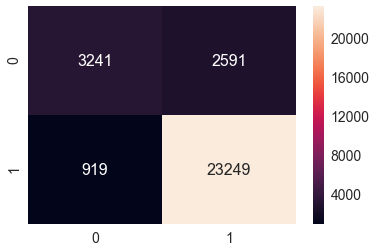

In [36]:
%%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
#Using optimal C value to find accuracy,precision,recall,f1_score on test data
from sklearn.svm import LinearSVC
clf = LinearSVC(C=0.5)
clf.fit(Train_BOW_X, Y_train)
y_pred = clf.predict(Test_BOW_X)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set:%0.3f%%"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 91.2571428571
precision: 0.922854245715
Recall: 0.975739235691
F1-score 0.948560189621


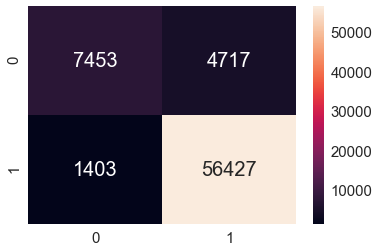

Wall time: 396 ms


In [37]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on train data
pred = clf.predict(Train_BOW_X)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train,pred)*100)
print("precision:",precision_score(Y_train,pred))
print("Recall:",recall_score(Y_train,pred))
print("F1-score",f1_score(Y_train,pred))
cm = pd.DataFrame(confusion_matrix(Y_train,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

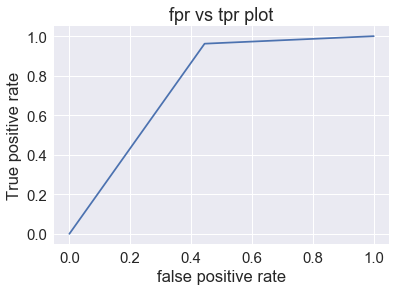

Area under curve is: 75.885%
Wall time: 196 ms


In [38]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

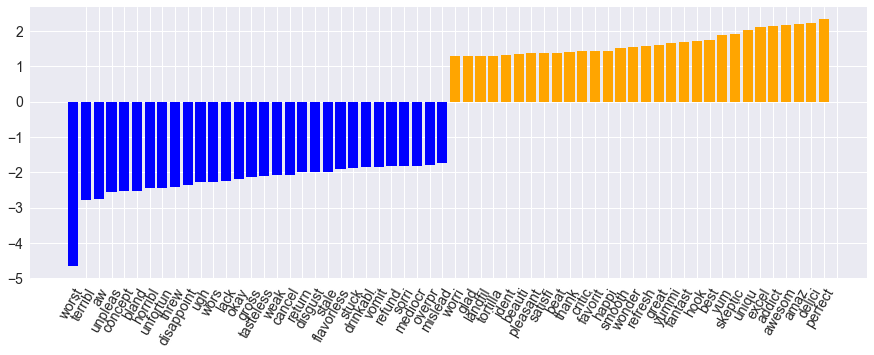

Wall time: 4.56 s


In [15]:
%%time
#ploting the important features of both positive and negative classes
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
def important_features_plot(classifier, vectorizer, top_features=30):
 important_features =vectorizer.get_feature_names()
 important_features= np.array(important_features)
 coefficients = classifier.coef_.ravel()
 positive_coefficients = np.argsort(coefficients)[-top_features:]
 negative_coefficients = np.argsort(coefficients)[:top_features]
 top_coefficients = np.hstack([negative_coefficients,positive_coefficients])
 plt.figure(figsize=(15, 5))
 plot_color = ['blue' if i < 0 else 'orange' for i in coefficients[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coefficients[top_coefficients], color=plot_color)
 plt.xticks(np.arange(1,1+2*top_features), important_features[top_coefficients], rotation=60, ha='right')
 plt.show()
count_vect = CountVectorizer()
count_vect.fit_transform(X_train)
important_features_plot(clf, count_vect)

# 1.2 BOW RBF kernel:

In [5]:
%%time
dense_Tr_BOW_X = openfromfile("dense_kfold_tr_bow_x.pickle")
dense_Te_BOW_X = openfromfile("dense_kfold_te_bow_x.pickle")

Wall time: 2.93 s


Finding the best 'C' and 'Gamma' using the Grid search cross validation(K-fold cross validation):

In [7]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
clf = SVC()
#params we need to try on classifier
param_dist = {'gamma':[1,0.5],
             'C':[1,0.5]} 
#using grid search cross validate to find best hyperparameter
gsv = GridSearchCV(clf,param_dist,cv=3,verbose=1)
gsv.fit(dense_Tr_BOW_X[:50000], Y_train[:50000])
#printing the hyperparameter.
print("Best HyperParameter: ",gsv.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 116.3min finished


Best HyperParameter:  {'C': 1, 'gamma': 1}
Best Accuracy: 87.34%
Wall time: 2h 16min 50s


Confusion matrices for test data
----------------------------
Accuracy on test set: 85.900%
Precision on test set: 0.867
Recall on test set: 0.975
F1-Score on test set: 0.918
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 16min 38s


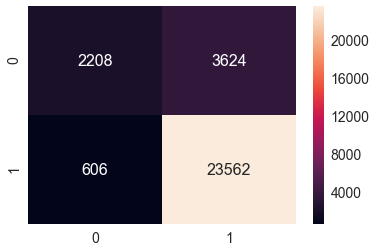

In [9]:
%%time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd
import seaborn as sns
y_pred=[]
#Using optimal C value to find accuracy,precision,recall,f1_score on test data
rsvm = SVC(C=1,gamma=1)
rsvm.fit(dense_Tr_BOW_X[:50000], Y_train[:50000])
#taking test data in intervals of 500 for prediction
for i in range(0,dense_Te_BOW_X.shape[0], 500):
        t = dense_Te_BOW_X[i:i+500]
        pred1 = rsvm.predict(t)
        y_pred.extend(pred1)
print("Confusion matrices for test data")
print("----------------------------")        
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 90.47
precision: 0.906197176915
Recall: 0.988221775352
F1-score 0.945433724592
Wall time: 7min 33s


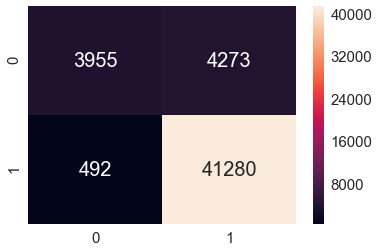

In [12]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on train data
pred=[]
#taking train data in intervals of 500 for prediction
for i in range(0,dense_Tr_BOW_X[:50000].shape[0], 500):
        t = dense_Tr_BOW_X[i:i+500]
        pred1 = rsvm.predict(t)
        pred.extend(pred1)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train[:50000],pred)*100)
print("precision:",precision_score(Y_train[:50000],pred))
print("Recall:",recall_score(Y_train[:50000],pred))
print("F1-score",f1_score(Y_train[:50000],pred))
cm = pd.DataFrame(confusion_matrix(Y_train[:50000],pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')

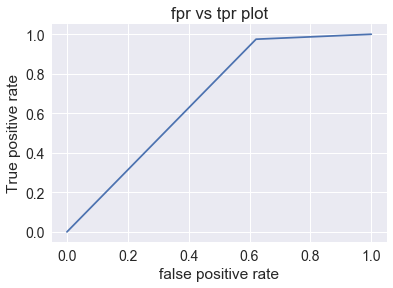

Area under curve is: 67.676%
Wall time: 296 ms


In [10]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

# Tf-idf:

In [6]:
%%time
#loading the TFIDF train and test data
Train_TFIDF_X = openfromfile("kfold_tr_tfidf_x.pickle")
Test_TFIDF_X= openfromfile("kfold_te_tfidf_x.pickle")
print(Train_TFIDF_X .shape)
print(Test_TFIDF_X.shape)

(70000, 37337)
(30000, 37337)
Wall time: 609 ms


# 2.1 Tfidf Linear kernel:

In [24]:
%%time
import warnings
warnings.filterwarnings('ignore')

Wall time: 1.01 ms


Finding the best 'C' using the Grid search cross validation(K-fold cross validation):

In [28]:
%%time
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
clf = LinearSVC()
#params we need to try on classifier
param_grid = {'C':[50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
#using grid search cross validate to find best hyperparameter
GSV = GridSearchCV(clf,param_grid,cv=3,verbose=1,n_jobs=-1)
GSV.fit(Train_TFIDF_X, Y_train)
#printing the hyperparameter.
print("Best HyperParameter: ",GSV.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(GSV.best_score_*100))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   33.7s finished


Best HyperParameter:  {'C': 0.5}
Best Accuracy: 88.56%
Wall time: 35.2 s


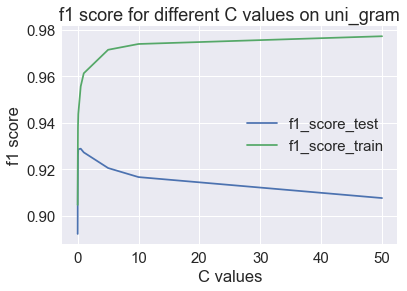

Wall time: 34.2 s


In [29]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
C=[50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
f1_score_test=[]
f1_score_train=[]
for i in C:
   lsvc =  LinearSVC(C=i)
   lsvc.fit(Train_TFIDF_X, Y_train)
   #finding the test score to plot
   predict_test=lsvc.predict(Test_TFIDF_X)
   f1_score_i= f1_score(Y_test,predict_test)
   f1_score_test.append(f1_score_i)
   #finding the train score to plot
   predict_train=lsvc.predict(Train_TFIDF_X)
   f1_score_j= f1_score(Y_train,predict_train)
   f1_score_train.append(f1_score_j)
sns.set_style("darkgrid");
plt.plot(C,f1_score_test)
plt.plot(C,f1_score_train)
plt.xlabel("C values")
plt.ylabel("f1 score")
plt.title("f1 score for different C values on uni_gram")
plt.gca().legend(('f1_score_test','f1_score_train'))
plt.show()    

Observation:

1.From the above graph, model is overfitting at high C values since,test score curve(blue line) is decreasing and train score(green line) is high.

2.And also model is underfitting at low C values since,test score curve(blue line) is low and train score(green line) is also low        

Confusion matrices for test data
----------------------------
Accuracy on test set: 88.173%
Precision on test set:0.900%
Recall on test set: 0.959
F1-Score on test set: 0.929
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 866 ms


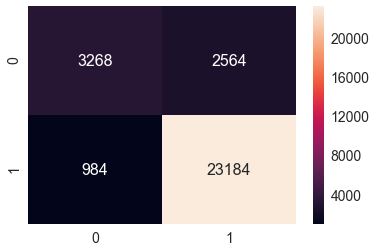

In [30]:
%%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
#Using optimal C value to find accuracy,precision,recall,f1_score on test data
from sklearn.svm import LinearSVC
clf = LinearSVC(C=0.5)
clf.fit(Train_TFIDF_X, Y_train)
y_pred = clf.predict(Test_TFIDF_X)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set:%0.3f%%"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 92.4957142857
precision: 0.933653354448
Recall: 0.978713470517
F1-score 0.955652548311


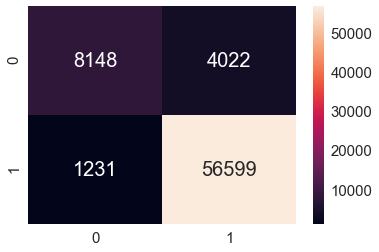

Wall time: 338 ms


In [31]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on train data
pred = clf.predict(Train_TFIDF_X)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train,pred)*100)
print("precision:",precision_score(Y_train,pred))
print("Recall:",recall_score(Y_train,pred))
print("F1-score",f1_score(Y_train,pred))
cm = pd.DataFrame(confusion_matrix(Y_train,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

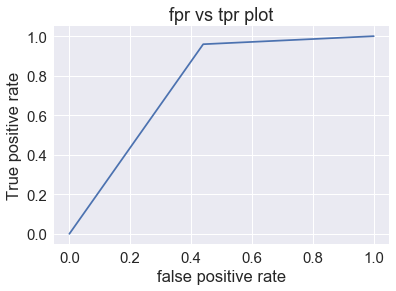

Area under curve is: 75.982%
Wall time: 200 ms


In [32]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

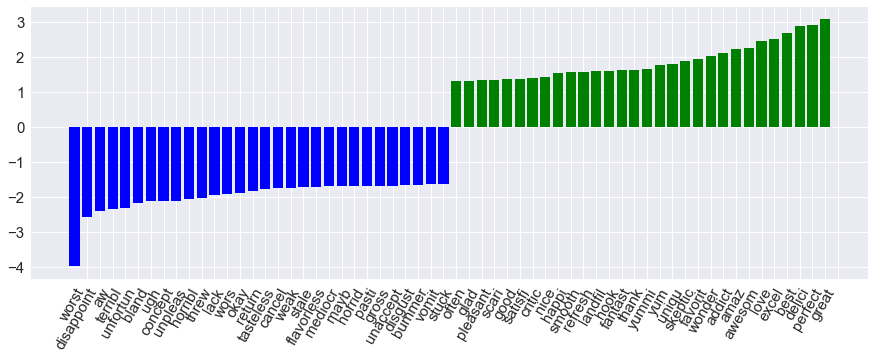

Wall time: 4.75 s


In [34]:
%%time
#ploting the important features of both positive and negative classes
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
def important_features_plot(classifier, vectorizer, top_features=30):
 important_features =vectorizer.get_feature_names()
 important_features= np.array(important_features)
 coefficients = classifier.coef_.ravel()
 positive_coefficients = np.argsort(coefficients)[-top_features:]
 negative_coefficients = np.argsort(coefficients)[:top_features]
 top_coefficients = np.hstack([negative_coefficients,positive_coefficients])
 plt.figure(figsize=(15, 5))
 plot_color = ['blue' if i < 0 else 'green' for i in coefficients[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coefficients[top_coefficients], color=plot_color)
 plt.xticks(np.arange(1,1+2*top_features), important_features[top_coefficients], rotation=60, ha='right')
 plt.show()
tfidf = TfidfVectorizer()
#vectorizing the train data.
tfidf.fit_transform(X_train)
important_features_plot(clf,tfidf)

# 2.2 Tfidf RBF kernel:

In [7]:
%%time
dense_Tr_tfidf_X = openfromfile("dense_kfold_tr_tfidf_x.pickle")
dense_Te_tfidf_X = openfromfile("dense_kfold_te_tfidf_x.pickle")

Wall time: 2.73 s


Finding the best 'C' and 'Gamma' using the Grid search cross validation(K-fold cross validation):

In [6]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
clf = SVC()
#params we need to try on classifier
param_dist = {'gamma':[1,0.5],
             'C':[1,0.5]} 
#using grid search cross validate to find best hyperparameter
gsv = GridSearchCV(clf,param_dist,cv=3,verbose=1)
gsv.fit(dense_Tr_tfidf_X[:50000], Y_train[:50000])
#printing the hyperparameter.
print("Best HyperParameter: ",gsv.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 104.1min finished


Best HyperParameter:  {'C': 1, 'gamma': 1}
Best Accuracy: 87.36%
Wall time: 1h 54min 33s


Confusion matrices for test data
----------------------------
Accuracy on test set: 86.087%
Precision on test set: 0.868
Recall on test set: 0.975
F1-Score on test set: 0.919
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 15min


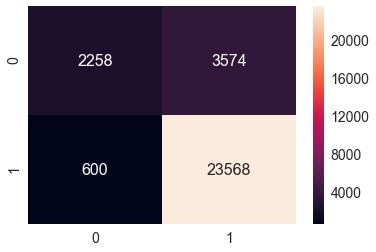

In [11]:
%%time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd
import seaborn as sns
y_pred=[]
#Using optimal C and gamma values to find accuracy,precision,recall,f1_score on test data
rsvm = SVC(C=1,gamma=1)
rsvm.fit(dense_Tr_tfidf_X[:50000], Y_train[:50000])
#taking test data in intervals of 500 for prediction
for i in range(0,dense_Te_tfidf_X.shape[0], 500):
        t = dense_Te_tfidf_X[i:i+500]
        pred1 = rsvm.predict(t)
        y_pred.extend(pred1)
print("Confusion matrices for test data")
print("----------------------------")        
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 89.376
precision: 0.898191428946
Recall: 0.984415397874
F1-score 0.939328871325
Wall time: 6min 11s


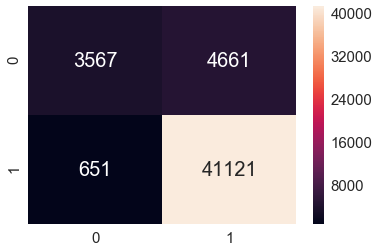

In [12]:
%%time
#Using optimal C and gamma values to find accuracy,precision,recall,f1_score on train data
pred=[]
#taking train data in intervals of 500 for prediction
for i in range(0,dense_Tr_tfidf_X[:50000].shape[0], 500):
        t = dense_Tr_tfidf_X[i:i+500]
        pred1 = rsvm.predict(t)
        pred.extend(pred1)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train[:50000],pred)*100)
print("precision:",precision_score(Y_train[:50000],pred))
print("Recall:",recall_score(Y_train[:50000],pred))
print("F1-score",f1_score(Y_train[:50000],pred))
cm = pd.DataFrame(confusion_matrix(Y_train[:50000],pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')

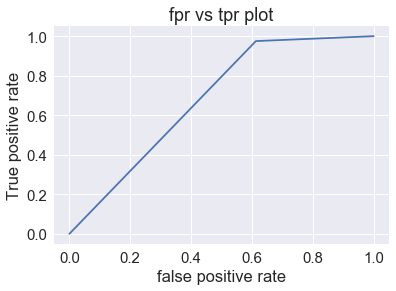

Area under curve is: 68.117%
Wall time: 188 ms


In [13]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

# 3.AVG-W2V:

In [14]:
%%time
#loading the Average word to vector train and test data
avg_w2v_tr = openfromfile("kfold_avg_w2v_tr.pickle")
avg_w2v_test = openfromfile("kfold_avg_w2v_te.pickle")
print(len(avg_w2v_tr))
print(len(avg_w2v_test))

70000
30000
Wall time: 679 ms


# 3.1 AVG-w2v Linear kernel:

Finding the best 'C' using the Grid search cross validation(K-fold cross validation):

In [15]:
%%time
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
clf = LinearSVC()
#params we need to try on classifier
param_grid = {'C':[50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]} 
#using grid search cross validate to find best hyperparameter
GSV = GridSearchCV(clf,param_grid,cv=3,verbose=1,n_jobs=-1)
GSV.fit(avg_w2v_tr, Y_train)
#printing the hyperparameter
print("Best HyperParameter: ",GSV.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(GSV.best_score_*100))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  3.6min finished


Best HyperParameter:  {'C': 0.1}
Best Accuracy: 85.89%
Wall time: 4min 4s


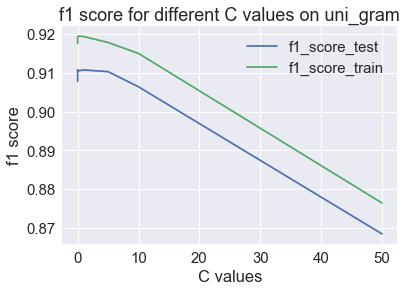

Wall time: 3min 18s


In [16]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
C=[50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
f1_score_test=[]
f1_score_train=[]
for i in C:
   lsvc =  LinearSVC(C=i)
   lsvc.fit(avg_w2v_tr, Y_train)
   #finding the test score to plot
   predict_test=lsvc.predict(avg_w2v_test)
   f1_score_i= f1_score(Y_test,predict_test)
   f1_score_test.append(f1_score_i)
   #finding the train score to plot
   predict_train=lsvc.predict(avg_w2v_tr)
   f1_score_j= f1_score(Y_train,predict_train)
   f1_score_train.append(f1_score_j)
sns.set_style("darkgrid");
plt.plot(C,f1_score_test)
plt.plot(C,f1_score_train)
plt.xlabel("C values")
plt.ylabel("f1 score")
plt.title("f1 score for different C values on uni_gram")
plt.gca().legend(('f1_score_test','f1_score_train'))
plt.show()    

Observation:

1.From the above graph, model is not overfitting at high C values since train score(green line) is low.

2.And also model is not underfitting at low C values since,test score curve(blue line) is high and train score(green line) is also high       

Confusion matrices for test data
----------------------------
Accuracy on test set: 84.620%
Precision on test set:0.857%
Recall on test set: 0.972
F1-Score on test set: 0.911
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 25.2 s


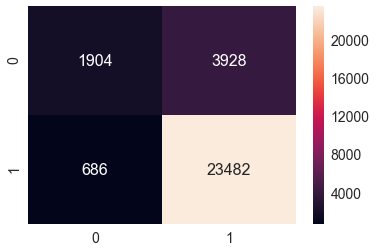

In [17]:
%%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
from sklearn.svm import LinearSVC
#Using optimal C value to find accuracy,precision,recall,f1_score on test data
clf = LinearSVC(C=0.1)
clf.fit(avg_w2v_tr, Y_train)
y_pred = clf.predict(avg_w2v_test)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set:%0.3f%%"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 85.9357142857
precision: 0.872826441658
Recall: 0.971277883451
F1-score 0.919424142475


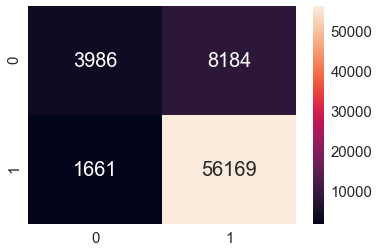

Wall time: 375 ms


In [18]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on train data
pred = clf.predict(avg_w2v_tr)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train,pred)*100)
print("precision:",precision_score(Y_train,pred))
print("Recall:",recall_score(Y_train,pred))
print("F1-score",f1_score(Y_train,pred))
cm = pd.DataFrame(confusion_matrix(Y_train,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

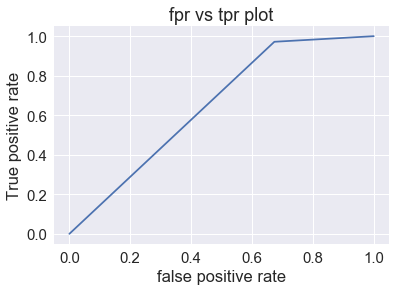

Area under curve is: 64.904%
Wall time: 179 ms


In [19]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

# 3.2  Avg-W2V RBF kernel:

Finding the best 'C' and 'Gamma' using the Grid search cross validation(K-fold cross validation):

In [20]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
clf = SVC()
#params we need to try on classifier.
param_dist = {'gamma':[1,0.5],
             'C':[1,0.5]} 
#using grid search cross validate to find best hyperparameter.
gsv = GridSearchCV(clf,param_dist,cv=3,verbose=1)
gsv.fit(avg_w2v_tr[:50000], Y_train[:50000])
#printing the hyperparameter.
print("Best HyperParameter: ",gsv.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 173.9min finished


Best HyperParameter:  {'C': 1, 'gamma': 1}
Best Accuracy: 83.55%
Wall time: 3h 19min 13s


Confusion matrices for test data
----------------------------
Accuracy on test set: 80.580%
Precision on test set: 0.806
Recall on test set: 1.000
F1-Score on test set: 0.892
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 1h 26min 20s


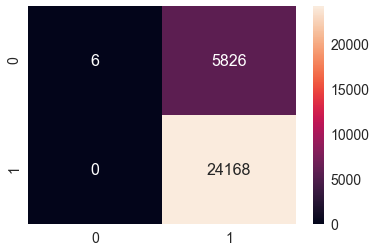

In [24]:
%%time
#Using optimal C and gamma values to find accuracy,precision,recall,f1_score on test data
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd
import seaborn as sns
y_pred=[]
#Using optimal C and gamma values to find accuracy,precision,recall,f1_score on test data
rsvm = SVC(C=1,gamma=1)
rsvm.fit(avg_w2v_tr, Y_train)
#taking test data in intervals of 500 for prediction
for i in range(0,len(avg_w2v_test), 500):
        t = avg_w2v_test[i:i+500]
        pred1 = rsvm.predict(t)
        y_pred.extend(pred1)
print("Confusion matrices for test data")
print("----------------------------")        
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 99.988
precision: 0.999856383743
Recall: 1.0
F1-score 0.999928186715
Wall time: 3min 46s


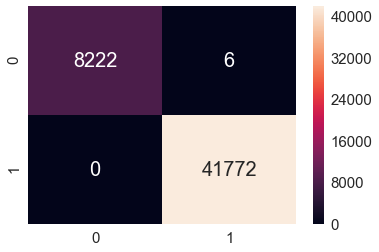

In [22]:
%%time
#Using optimal C and gamma values to find accuracy,precision,recall,f1_score on train data
pred=[]
#taking train data in intervals of 500 for prediction
for i in range(0,len(avg_w2v_tr[:50000]), 500):
        t = avg_w2v_tr[i:i+500]
        pred1 = rsvm.predict(t)
        pred.extend(pred1)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train[:50000],pred)*100)
print("precision:",precision_score(Y_train[:50000],pred))
print("Recall:",recall_score(Y_train[:50000],pred))
print("F1-score",f1_score(Y_train[:50000],pred))
cm = pd.DataFrame(confusion_matrix(Y_train[:50000],pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')

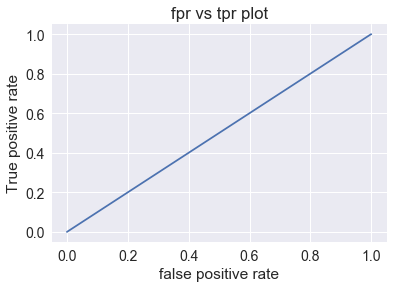

Area under curve is: 50.051%
Wall time: 187 ms


In [25]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

# 4.Tf-idf- W2V:

In [4]:
%%time
#loading the tfidf word to vector train and test data
tfidf_w2v_tr = openfromfile("kfold_tfidf_w2v_tr.pickle")
tfidf_w2v_test = openfromfile("kfold_tfidf_w2v_te.pickle")
print(len(tfidf_w2v_tr))
print(len(tfidf_w2v_test))

70000
30000
Wall time: 654 ms


# 4.1 Tfidf Linear kernel:

Finding the best 'C' using the Grid search cross validation(K-fold cross validation):

In [46]:
%%time
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
clf = LinearSVC()
#params we need to try on classifier.
param_grid = {'C':[50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
#using grid search cross validate to find best hyperparameter.
GSV = GridSearchCV(clf,param_grid,cv=3,verbose=1,n_jobs=-1)
GSV.fit(tfidf_w2v_tr, Y_train)
#printing the hyperparameter.
print("Best HyperParameter: ",GSV.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(GSV.best_score_*100))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  3.6min finished


Best HyperParameter:  {'C': 5}
Best Accuracy: 84.77%
Wall time: 4min 8s


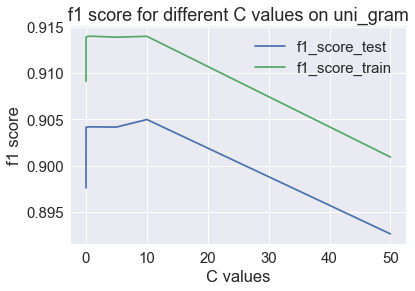

Wall time: 2min 55s


In [47]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
C=[50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
f1_score_test=[]
f1_score_train=[]
for i in C:
   lsvc =  LinearSVC(C=i)
   lsvc.fit(tfidf_w2v_tr, Y_train)
    #finding the test score to plot
   predict_test=lsvc.predict(tfidf_w2v_test)
   f1_score_i= f1_score(Y_test,predict_test)
   f1_score_test.append(f1_score_i)
   #finding the train score to plot
   predict_train=lsvc.predict(tfidf_w2v_tr)
   f1_score_j= f1_score(Y_train,predict_train)
   f1_score_train.append(f1_score_j)
sns.set_style("darkgrid");
plt.plot(C,f1_score_test)
plt.plot(C,f1_score_train)
plt.xlabel("C values")
plt.ylabel("f1 score")
plt.title("f1 score for different C values on uni_gram")
plt.gca().legend(('f1_score_test','f1_score_train'))
plt.show()    

Observation:

1.From the above graph, model is not overfitting  at high C values as train score(green line) is decreasing at high C values.

2.And also model is not underfitting at low C values since,test score curve(blue line) is at medium and train score(green line) is at high        

Confusion matrices for test data
----------------------------
Accuracy on test set: 83.390%
Precision on test set:0.842%
Recall on test set: 0.976
F1-Score on test set: 0.905
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 33.8 s


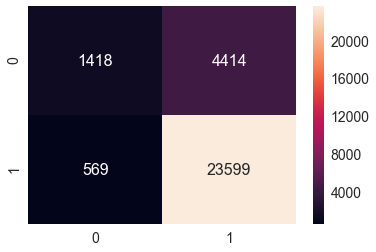

In [48]:
%%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import pandas as pd
from sklearn.svm import LinearSVc
#Using optimal C value to find accuracy,precision,recall,f1_score on test data
clf = LinearSVC(C=5)
clf.fit(tfidf_w2v_tr, Y_train)
y_pred = clf.predict(tfidf_w2v_test)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set:%0.3f%%"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 84.8242857143
precision: 0.859946626001
Recall: 0.975116721425
F1-score 0.913917588428


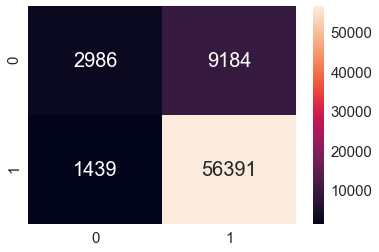

Wall time: 446 ms


In [49]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on train data
pred = clf.predict(tfidf_w2v_tr)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train,pred)*100)
print("precision:",precision_score(Y_train,pred))
print("Recall:",recall_score(Y_train,pred))
print("F1-score",f1_score(Y_train,pred))
cm = pd.DataFrame(confusion_matrix(Y_train,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

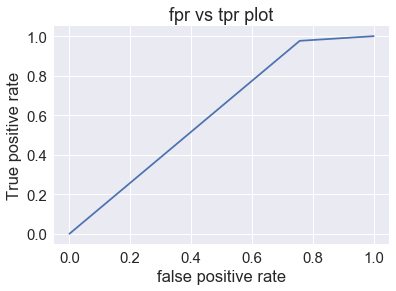

Area under curve is: 60.980%
Wall time: 168 ms


In [50]:
%%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

# 4.2 Tfidf RBF kernel:

Finding the best 'C' and 'Gamma' using the Grid search cross validation(K-fold cross validation):

In [27]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
clf = SVC()
#params we need to try on classifier
param_dist = {'gamma':[1,0.5],
             'C':[1,0.5]} 
#using grid search cross validate to find best hyperparameter.
gsv = GridSearchCV(clf,param_dist,cv=3,verbose=1)
gsv.fit(tfidf_w2v_tr[:50000], Y_train[:50000])
#printing the hyperparameter.
print("Best HyperParameter: ",gsv.best_params_)
#printing the accuracy score.
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 154.3min finished


Best HyperParameter:  {'C': 1, 'gamma': 1}
Best Accuracy: 83.55%
Wall time: 3h 35min 13s


Confusion matrices for test data
----------------------------
Accuracy on test set: 80.567%
Precision on test set: 0.806
Recall on test set: 1.000
F1-Score on test set: 0.892
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 28min 2s


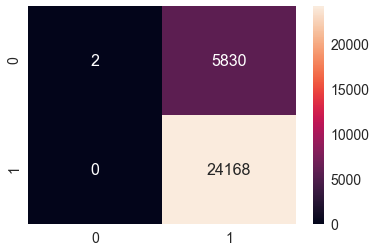

In [6]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on test data
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd
import seaborn as sns
y_pred=[]
rsvm = SVC(C=1,gamma=1)
rsvm.fit(tfidf_w2v_tr[:50000], Y_train[:50000])
#taking test data in intervals of 500 for prediction
for i in range(0,len(tfidf_w2v_test), 500):
        t = tfidf_w2v_test[i:i+500]
        pred1 = rsvm.predict(t)
        y_pred.extend(pred1)
print("Confusion matrices for test data")
print("----------------------------")        
print("Accuracy on test set: %0.3f%%"%(accuracy_score( Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 99.992
precision: 0.999904251245
Recall: 1.0
F1-score 0.99995212333
Wall time: 4min 21s


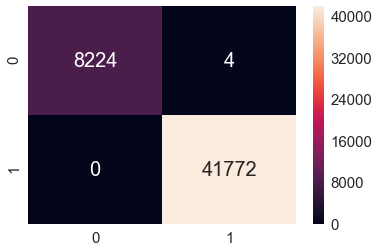

In [7]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on train data
pred=[]
#taking train data in intervals of 500 for prediction
for i in range(0,len(tfidf_w2v_tr[:50000]), 500):
        t = tfidf_w2v_tr[i:i+500]
        pred1 = rsvm.predict(t)
        pred.extend(pred1)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train[:50000],pred)*100)
print("precision:",precision_score(Y_train[:50000],pred))
print("Recall:",recall_score(Y_train[:50000],pred))
print("F1-score",f1_score(Y_train[:50000],pred))
cm = pd.DataFrame(confusion_matrix(Y_train[:50000],pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')

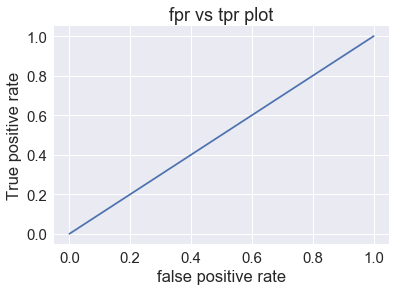

Area under curve is: 50.017%


In [8]:
# %%time
#Area under curve for the fpr vs tpr plots
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
sns.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.title("fpr vs tpr plot")
plt.show()
print("Area under curve is: %0.3f%%"%(metrics.auc(fpr, tpr)*100))

# Summary:

**Support vector machine with different text classifications:**
**Below values are for test data**   

**Linear Kernel:**    

|          |sample size|Optimal_lambda(1/C)|              |              |              |            |       |                            
|----------|-----------|-------------------|--------------|--------------|--------------|------------|-------| 
|          |           |                   |Accuracy      |Precision     |Recall        |F1-score    |AUC    |
|BOW       |  100k     |1/5=0.2            |   88.24%     |    0.900     |    0.960     |  0.929     |75.88  |
|TF-IDF    |  100k     |1/1=1.0            |   87.77%     |    0.888     |    0.969     |  0.927     |75.98  |
|Avg-W2V   |  100k     |1/0.00005=20,000   |   82.88%     |    0.839     |    0.971     |  0.900     |64.90  |
|TF-IDF W2V|  100k     |1/0.1=10           |   83.33%     |    0.845     |    0.968     |  0.903     |60.98  |
    

**RBF Kernel:**    

|          |sample size|Optimal_lambda(1/C)|Gamma|              |              |              |            |        |                            
|----------|-----------|-------------------|-----|--------------|--------------|--------------|------------|--------|
|          |           |                   |     |Accuracy      |Precision     |Recall        |F1-score    |AUC     |
|BOW       |  100k     |1                  |1    |   85.90%     |    0.867     |    0.975     |  0.918     |67.67   |
|TF-IDF    |  100k     |1                  |1    |   86.08%     |    0.868     |    0.975     |  0.919     |68.11   |       
|Avg-W2V   |  100k     |1                  |1    |   80.58%     |    0.806     |    1.000     |  0.892     |50.05   |
|TF-IDF W2V|  100k     |1                  |1    |   80.56%     |    0.806     |    1.000     |  0.892     |50.01   |

Step by step procedure:

1.Firstly 100k rows were taken and splitted into 70:30 as 70k rows for train data,30k rows for test data.    

2.Then converted these train and test data into vectors by using Bag of words,Tfidf,Avg word 2 vec and   Tfidf word 2 vec.

3.Now applied Supportvector classifier with linear kernel for the trained data to find the optimum C value using K-fold cross validation.And then found test and cv f1 scores.

4.Using the obtained C value found the metrics for both train and test data.And then found important features for both positive and negative classes.And then found the Area under curve for fpr vs tpr plots.

5.Similarly done with RBF kernel version of Support vector classifiers. 